In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
#tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
#tf.keras.layers.Dense(512, activation=tf.nn.relu),
#tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
tf.keras.layers.Dense(512, activation=tf.nn.relu),
#tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=1)

W1025 19:32:02.516133  8596 deprecation.py:506] From C:\Users\Artem\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/5
60000/60000 [==============================] - 37s 614us/sample - loss: 0.2301 - acc: 0.9329
Epoch 2/5
60000/60000 [==============================] - 35s 581us/sample - loss: 0.1166 - acc: 0.9682
Epoch 3/5
60000/60000 [==============================] - 37s 612us/sample - loss: 0.0878 - acc: 0.9764
Epoch 4/5
60000/60000 [==============================] - 36s 596us/sample - loss: 0.0713 - acc: 0.9808
Epoch 5/5
10000/10000 [==============================] - 2s 211us/sample - loss: 0.1319 - acc: 0.9729


[0.13188342308936846, 0.9729]

In [16]:
model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [17]:
loss, acc = model.evaluate(x_test, y_test)
print("Loss = {}, accuracy = {}".format(loss, acc))

10000/10000 [==============================] - 2s 174us/sample - loss: 0.2537 - acc: 0.9475
Loss = 0.25365219219699503, accuracy = 0.9474999904632568


In [18]:
loss, acc = model.evaluate(x_train, y_train)
print("Loss = {}, accuracy = {}".format(loss, acc))

60000/60000 [==============================] - 10s 164us/sample - loss: 0.1929 - acc: 0.9560
Loss = 0.19288722769195835, accuracy = 0.9560333490371704


In [19]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 35s 584us/sample - loss: 0.1030 - acc: 0.9750 - val_loss: 0.1164 - val_acc: 0.9723
Epoch 2/5
60000/60000 [==============================] - 35s 575us/sample - loss: 0.0765 - acc: 0.9807 - val_loss: 0.1209 - val_acc: 0.9742
Epoch 3/5
60000/60000 [==============================] - 34s 573us/sample - loss: 0.0643 - acc: 0.9836 - val_loss: 0.1205 - val_acc: 0.9743
Epoch 4/5
60000/60000 [==============================] - 35s 581us/sample - loss: 0.0570 - acc: 0.9861 - val_loss: 0.1269 - val_acc: 0.9749
Epoch 5/5
60000/60000 [==============================] - 35s 589us/sample - loss: 0.0501 - acc: 0.9877 - val_loss: 0.1641 - val_acc: 0.9758


In [27]:
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

10000/10000 [==============================] - 2s 163us/sample - loss: 0.1641 - acc: 0.9758
Train: 0.990, Test: 0.976


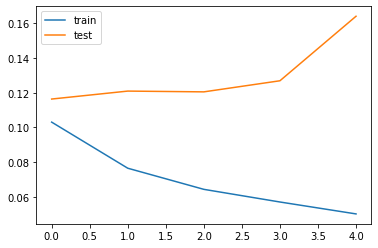

In [28]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

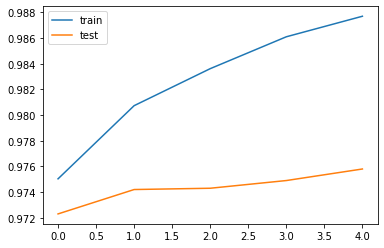

In [29]:
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()